Project Members:                                                  
- Daniel Arday
- Kevin Akman
- Albert Chen

Date:  10/23/2023


### Final Requirements - for our rerefence as we complete the assignment

Technical Report: One PDF document with your final technical report. This should describe your preparation and analysis of the data, discuss the final model selection, and describe the statistics behind your final model selection.
You should include the following sections in your report:
- Introduction
- Data Cleaning/Preparation
- Exploratory Data Analysis
- Model Selection
- Model Analysis
- Conclusion and Recommendations.

# Introduction

The UCI Computer Hardward dataset (https://archive.ics.uci.edu/dataset/29/computer+hardware) was created by Jacob Feldmesser to compare relative CPU Performance Data, described in terms of its cycle time, memory size, and other metrics for the paper "Attributes of the performance of central processing units: a relative performance prediction model" ( Ein-Dor & Feldmesser, 1987). In this article, the authors determined the estimated relative performance values utilizing a linear regression method. Refer to pages 308-313 of their publication for a detailed explanation of how the relative performance values were established (https://archive.ics.uci.edu/dataset/29/computer+hardware, 2023).


### Objective

**Our goal with analyzing this dataset is to create a linear regression model to estimate relative CPU performance values.**

### Data Description/Attribuite Information
   1. `Vendor Name`: 30 
      (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, 
       dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, 
       microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, 
       sratus, wang)
   2. `Model Name`: many unique symbols
   3. `MYCT`: machine cycle time in nanoseconds (integer)
   4. `MMIN`: minimum main memory in kilobytes (integer)
   5. `MMAX`: maximum main memory in kilobytes (integer)
   6. `CACH`: cache memory in kilobytes (integer)
   7. `CHMIN`: minimum channels in units (integer)
   8. `CHMAX`: maximum channels in units (integer)
   9. `PRP`: published relative performance (integer)
   10. `ERP`: estimated relative performance from the original article (integer)

### Loading libraries and  Understanding the data

In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# to do mathematical computations
import math
# To build linear model for prediction
from sklearn.linear_model import LinearRegression
# To check model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('machine.csv', sep=',')
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 208 rows and 10 columns.


In [4]:
data.head(5)

,adviser,32/60,125,256,6000,256.1,16,128,198,199
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


### Initial Observation: This csv does not include a row for the Data Labes, so we will need to add that in.

In [5]:
#Adding in the Attribute Information
data.attrs['info'] = {
    'Vendor Name': 'Text',
    'Model Name': 'Numeric',
    'MYCT': 'Numeric',
    'MMIN': 'Numeric',
    'CACH': 'Numeric',
    'CHMIN': 'Numeric',
    'CHMAX': 'Numeric',
    'CHMAX': 'Numeric',
    'PRP': 'Numeric',
    'ERP': 'Numeric'
}

In [6]:
data.describe()

,125,256,6000,256.1,16,128,198,199
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,204.201923,2880.538462,11824.019231,24.096154,4.644231,17.740385,105.177885,98.850962
std,260.833016,3883.839300,11747.916663,37.417999,6.787198,24.913375,161.090223,154.974961
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,49.500000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,111.500000,99.500000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [7]:
# Attribute Information Row
attribute_info = ['Vendor Name','Model Name','MYCT','MMIN','CACH','CHMIN','CHMAX','CHMAX','PRP','ERP']
data.columns = attribute_info
data

,Vendor Name,Model Name,MYCT,MMIN,CACH,CHMIN,CHMAX,CHMAX,PRP,ERP
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290
...,...,...,...,...,...,...,...,...,...,...
203,sperry,80/8,124,1000,8000,0,1,8,42,37
204,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
205,sratus,32,125,2000,8000,0,2,14,52,41
206,wang,vs-100,480,512,8000,32,0,0,67,47


In [8]:
#Now that we've added the columns let's make a working copy, and see the statistics
df = data.copy()
df

,Vendor Name,Model Name,MYCT,MMIN,CACH,CHMIN,CHMAX,CHMAX,PRP,ERP
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290
...,...,...,...,...,...,...,...,...,...,...
203,sperry,80/8,124,1000,8000,0,1,8,42,37
204,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
205,sratus,32,125,2000,8000,0,2,14,52,41
206,wang,vs-100,480,512,8000,32,0,0,67,47


# Data Cleaning & Preparation

### Dealing with Missing Values

In [10]:
df.isnull().sum()

Vendor Name    0
Model Name     0
MYCT           0
MMIN           0
CACH           0
CHMIN          0
CHMAX          0
CHMAX          0
PRP            0
ERP            0
dtype: int64

No missing values, so no intepolation is needed.

# Exploratory Data Analysis

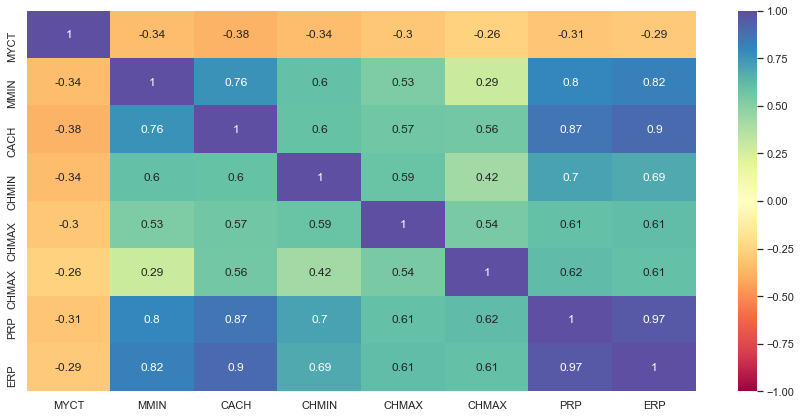

In [9]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()

**Observations**

# Model Selection

# Model Analysis

# Conclusion and Recommendations

# Refences

https://dl.acm.org/doi/10.1145/32232.32234

https://archive.ics.uci.edu/dataset/29/computer+hardware


## Machine.Name Files (Via the UCI Repository)


1. Title: Relative CPU Performance Data 

2. Source Information
   -- Creators: Phillip Ein-Dor and Jacob Feldmesser
     -- Ein-Dor: Faculty of Management; Tel Aviv University; Ramat-Aviv; 
        Tel Aviv, 69978; Israel
   -- Donor: David W. Aha (aha@ics.uci.edu) (714) 856-8779   
   -- Date: October, 1987
 
3. Past Usage:
    1. Ein-Dor and Feldmesser (CACM 4/87, pp 308-317)
       -- Results: 
          -- linear regression prediction of relative cpu performance
          -- Recorded 34% average deviation from actual values 
    2. Kibler,D. & Aha,D. (1988).  Instance-Based Prediction of
       Real-Valued Attributes.  In Proceedings of the CSCSI (Canadian
       AI) Conference.
       -- Results:
          -- instance-based prediction of relative cpu performance
          -- similar results; no transformations required
    - Predicted attribute: cpu relative performance (numeric)

4. Relevant Information:
   -- The estimated relative performance values were estimated by the authors
      using a linear regression method.  See their article (pp 308-313) for
      more details on how the relative performance values were set.

5. Number of Instances: 209 

6. Number of Attributes: 10 (6 predictive attributes, 2 non-predictive, 
                             1 goal field, and the linear regression's guess)

7. Attribute Information:
   1. vendor name: 30 
      (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, 
       dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, 
       microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, 
       sratus, wang)
   2. Model Name: many unique symbols
   3. MYCT: machine cycle time in nanoseconds (integer)
   4. MMIN: minimum main memory in kilobytes (integer)
   5. MMAX: maximum main memory in kilobytes (integer)
   6. CACH: cache memory in kilobytes (integer)
   7. CHMIN: minimum channels in units (integer)
   8. CHMAX: maximum channels in units (integer)
   9. PRP: published relative performance (integer)
  10. ERP: estimated relative performance from the original article (integer)

8. Missing Attribute Values: None

9. Class Distribution: the class value (PRP) is continuously valued.
   PRP Value Range:   Number of Instances in Range:
   0-20               31
   21-100             121
   101-200            27
   201-300            13
   301-400            7
   401-500            4
   501-600            2
   above 600          4

Summary Statistics:
	   Min  Max   Mean    SD      PRP Correlation
   MCYT:   17   1500  203.8   260.3   -0.3071
   MMIN:   64   32000 2868.0  3878.7   0.7949
   MMAX:   64   64000 11796.1 11726.6  0.8630
   CACH:   0    256   25.2    40.6     0.6626
   CHMIN:  0    52    4.7     6.8      0.6089
   CHMAX:  0    176   18.2    26.0     0.6052
   PRP:    6    1150  105.6   160.8    1.0000
   ERP:   15    1238  99.3    154.8    0.9665

